### Metadata

1. Age: Represents the duration since the opportunity was first identified, typically measured in days, weeks, or months.
2. Technology Primary: Categorizes the sales opportunity by the specific technology or cloud solution being offered.
3. Joining Date: Marks the date on which the sales lead was entered the potential customer relationship.
4. Joined Through Referral: Indicates whether the opportunity originated from a referral, with a binary 'Yes' or 'No' response.
5. Referral ID: Provides a unique code associated with the individual or entity that referred the sales lead.
6. Preferred Offer Types: Details the promotional offers that have historically resonated with the prospect, such as discounts or bundled services.
7. Last Visit Time: Records the timestamp of the most recent interaction the potential client had with the company's platform or sales team.
8. Days Since Last Login: Counts the number of days elapsed since the prospect last accessed the company’s online system or portal.
9. Avg Time Spent: Averages the amount of time the prospect spends during each interaction with the company's services or platforms.
10. Opportunity Size (USD): Estimates the financial value of the sales opportunity, expressed in U.S. dollars.
11. Avg Frequency Login Days: Calculates the average interval between logins or active engagements by the prospect with the company's online systems.
12. Points in Wallet: Denotes the number of loyalty points accumulated by the prospect if a loyalty program is in place.
13. Used Special Discount: Confirms whether the prospect has taken advantage of a special discount provided by the company in the past.
14. Offer Application Preference: Describes the prospect's preferred method for receiving and utilizing promotional offers.
15. Past Complaint: Signals if the prospect has previously lodged a complaint regarding the company's products or services.
16. Complaint Status: Clarifies the current resolution status of any complaints submitted by the prospect.
17. Feedback: Captures any feedback provided by the prospect, offering insights into their satisfaction and experiences with the company.
18. Churn: Identifies whether the prospect has discontinued their business relationship or is considered at risk of ending it.

In [1]:
#importing all necessary libraries

# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#----regular expressions----
import re

#----model and support imports----
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, randint

# Feature Engineering
from category_encoders import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

# Deployment
from flask import Flask, render_template, request
import pickle

# Set the default style for plotting
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

# Set visualisation styles
sns.set(style="whitegrid")

In [2]:
# Loading dataset
df = pd.read_csv('data/churn.csv')

# Display the first few rows of the dataset to get an overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   Technology Primary            36992 non-null  object 
 2   joining_date                  36992 non-null  object 
 3   joined_through_referral       36992 non-null  object 
 4   referral_id                   36992 non-null  object 
 5   preferred_offer_types         36704 non-null  object 
 6   last_visit_time               36992 non-null  object 
 7   days_since_last_login         36992 non-null  int64  
 8   avg_time_spent                36992 non-null  float64
 9   Opportunity Size (USD)        36992 non-null  float64
 10  avg_frequency_login_days      36992 non-null  object 
 11  points_in_wallet              33549 non-null  float64
 12  used_special_discount         36992 non-null  object 
 13  o

In [3]:
# Rename the column
df.rename(columns = {'Technology Primary':'technology_primary', 'Opportunity Size (USD)':'opportunity_size_usd'}, inplace = True)

# Save the updated DataFrame to the existing file
df.to_csv('churn.csv', index=False)

In [4]:
df.describe()

,age,days_since_last_login,avg_time_spent,opportunity_size_usd,points_in_wallet,churn
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,0.540982
std,15.867412,228.819900,398.289149,19444.806226,194.063616,0.498324
min,10.000000,-999.000000,-2814.109110,800.460000,-760.660000,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,0.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,1.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.070000,1.000000


In [5]:
missing_values = df.isnull().sum()
print('Remaining Missing Values:\n', missing_values)

Remaining Missing Values:
 age                                0
technology_primary                 0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
opportunity_size_usd               0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn                              0
dtype: int64


In [6]:
df.preferred_offer_types.unique()

array(['Gift Vouchers/Coupons', 'Credit/Debit Card Offers',
       'Without Offers', nan], dtype=object)

In [7]:
df.preferred_offer_types.fillna(df.preferred_offer_types.mode()[0], inplace=True)

In [10]:
df.points_in_wallet.fillna(df.points_in_wallet.median(), inplace=True)

In [12]:
missing_values = df.isna().sum()
print('Remaining Missing Values:\n', missing_values)

Remaining Missing Values:
 age                             0
technology_primary              0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
opportunity_size_usd            0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn                           0
dtype: int64


In [13]:
df.head()

,age,technology_primary,joining_date,joined_through_referral,referral_id,preferred_offer_types,last_visit_time,days_since_last_login,avg_time_spent,opportunity_size_usd,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn
0,18,Analytics,17/08/2017,No,xxxxxxxx,Gift Vouchers/Coupons,16:08:02,17,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Intuitive User Interface,0
1,32,ERP Implementation,28/08/2017,?,CID21329,Gift Vouchers/Coupons,12:38:13,16,306.34,12838.38,10,697.62,Yes,No,Yes,Solved,Proactive Issue Resolution,0
2,44,ERP Implementation,11/11/2016,Yes,CID12313,Gift Vouchers/Coupons,22:53:21,14,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Unhelpful Online Resources,1
3,37,ERP Implementation,29/10/2016,Yes,CID3793,Gift Vouchers/Coupons,15:57:50,11,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Unhelpful Online Resources,1
4,31,Technical Business Solutions,12/09/2017,No,xxxxxxxx,Credit/Debit Card Offers,15:46:44,20,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Unhelpful Online Resources,1


In [18]:
df.joined_through_referral.value_counts()

joined_through_referral
No     15839
Yes    15715
?       5438
Name: count, dtype: int64

In [19]:
# We'll drop the 'referral_id'
df.drop(['referral_id'], axis=1, inplace=True)

In [20]:
# Display the distribution of churn
churn_dist = df.churn.value_counts()
print('Churn Distribution:\n', churn_dist)

Churn Distribution:
 churn
1    20012
0    16980
Name: count, dtype: int64


#### Duplicate Check

In [22]:
df_dup = df.copy()

# Dropping the entired rows if they're duplicated
df_dup.drop_duplicates(subset=None, inplace=True)
df = df_dup
df.shape

(36992, 17)

##### Correlation between numerical columns

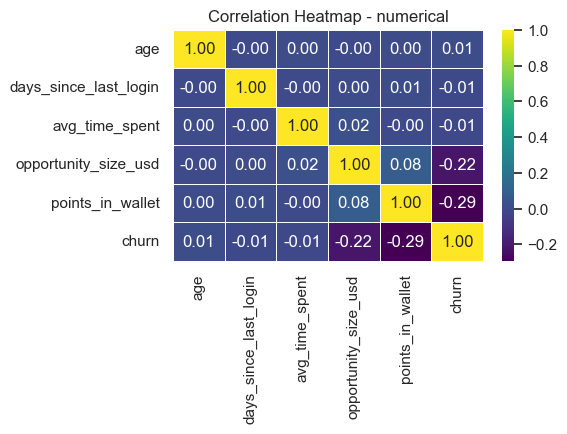

In [26]:
# Select numerical columns 
num_col = df.select_dtypes(include=['int64', 'float64']).columns

# Create a correlation matrix for the numerical columns 
corr_mat = df[num_col].corr()

# Plot the correlation heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(corr_mat, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap - numerical')
plt.show()

##### Distribution of Opportunity size by Churn:

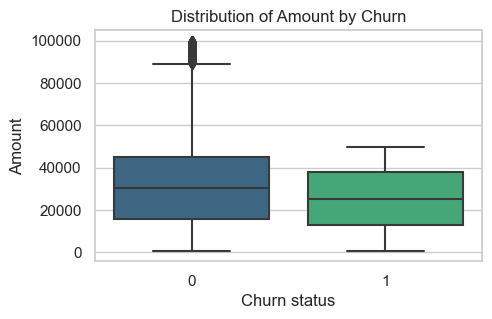

In [31]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='churn', y='opportunity_size_usd', data=df, palette='viridis')
plt.title('Distribution of Amount by Churn')
plt.xlabel('Churn status')
plt.ylabel('Amount')
plt.show()

#### Categorical columns

technology_primary
ERP Implementation              23083
Technical Business Solutions    13485
Legacy Modernization              310
Analytics                         114
Name: count, dtype: int64


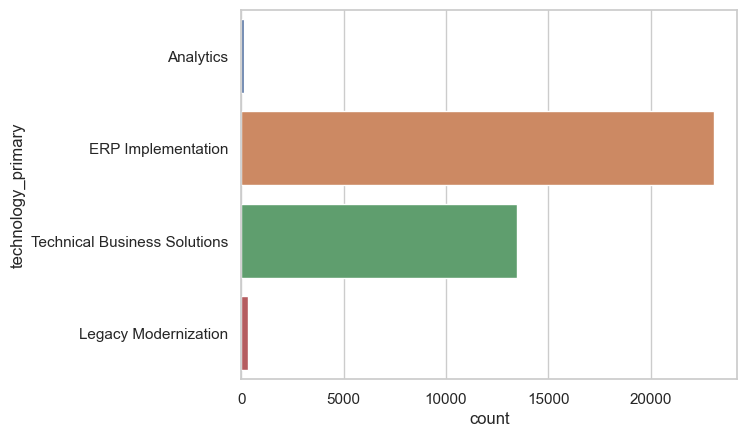

joined_through_referral
No     15839
Yes    15715
?       5438
Name: count, dtype: int64


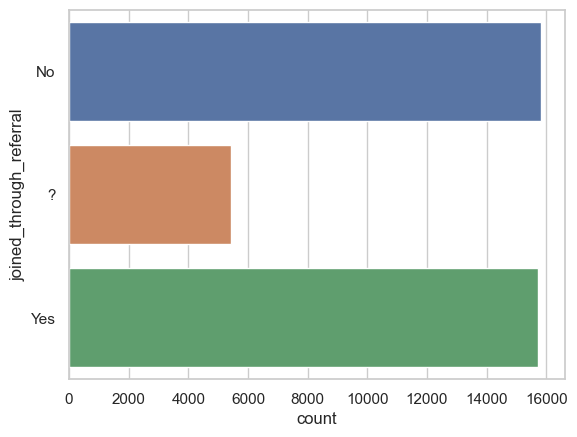

preferred_offer_types
Gift Vouchers/Coupons       12637
Credit/Debit Card Offers    12274
Without Offers              12081
Name: count, dtype: int64


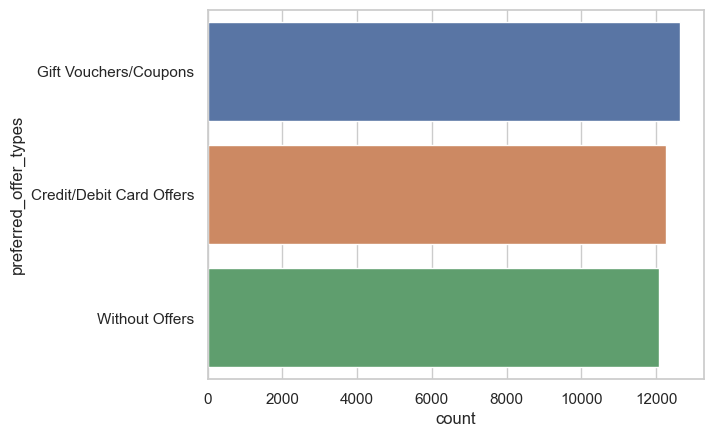

used_special_discount
Yes    20342
No     16650
Name: count, dtype: int64


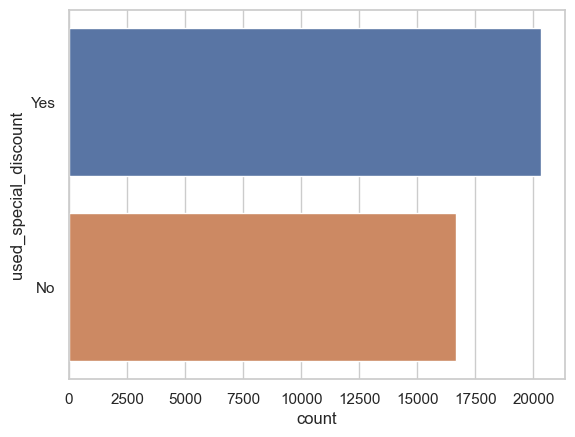

offer_application_preference
Yes    20440
No     16552
Name: count, dtype: int64


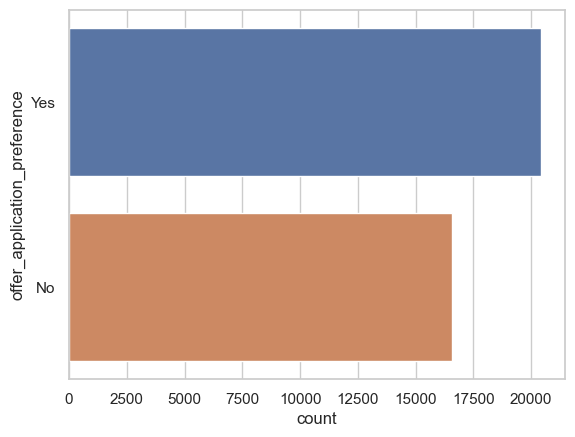

past_complaint
No     18602
Yes    18390
Name: count, dtype: int64


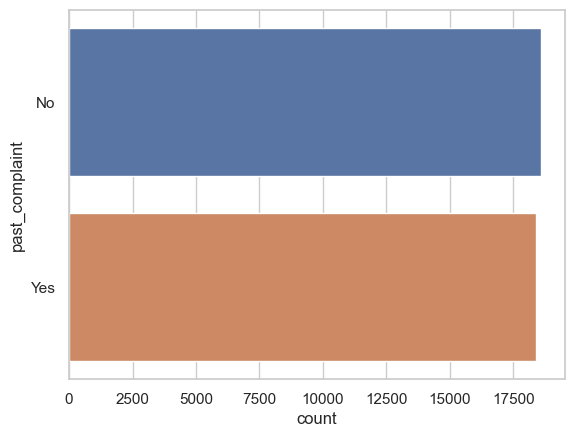

complaint_status
Not Applicable              18602
Unsolved                     4644
Solved                       4619
Solved in Follow-up          4577
No Information Available     4550
Name: count, dtype: int64


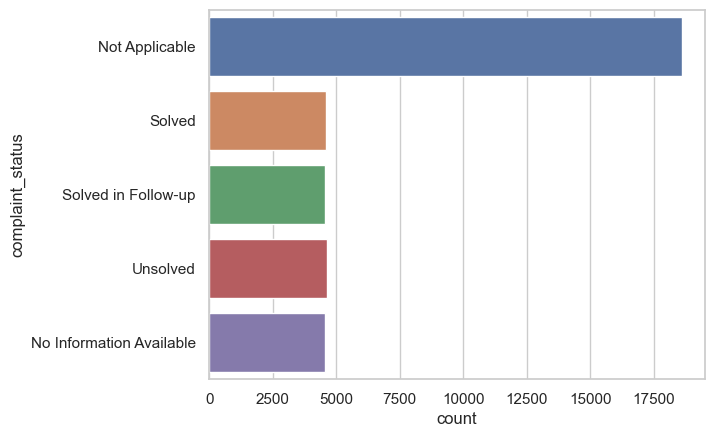

feedback
Frequent Software Downtime            6350
No reason specified                   6290
Excessive Marketing Communications    6279
Unhelpful Online Resources            6271
Support Response Delays               6252
Value for Money Solutions             1417
Intuitive User Interface              1392
Reliable Service Availability         1381
Proactive Issue Resolution            1360
Name: count, dtype: int64


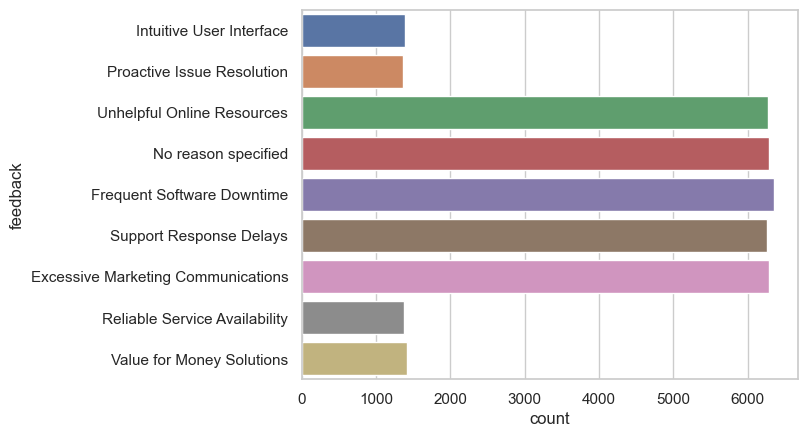

In [34]:
# Value counts and bar plots for categorical 
exclude_col = ['joining_date', 'last_visit_time', 'avg_frequency_login_days']

for col in df.select_dtypes(include='object').columns:
    if col not in exclude_col:
        print(df[col].value_counts())
        sns.countplot(y=col, data=df)
        plt.show()

In [38]:
# Removing outlier

col_with_outliers = ['days_since_last_login', 'avg_time_spent', 'points_in_wallet']

# Calculate the IQR for these columns
for col in col_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

# Define a threshold for identifying outliers
outlier_threshold = 1.5  # Adjust as needed

# Create a boolean mask for outliers
outlier_mask = (df[col] < (Q1 - outlier_threshold * IQR)) | (df[col] > (Q3 + outlier_threshold * IQR))

# Drop rows containing outliers
df.drop(df[outlier_mask].index, inplace=True)


In [48]:
# Histograms and box plots for numerical columns
for col in df.select_dtypes(include=np.number).columns:
    if col != 'churn'
    df[col].hist()
    plt.title(col)
    plt.show()
    sns.boxplot(x=col, data=df)
    plt.show()

SyntaxError: expected ':' (1033463642.py, line 3)

In [46]:
df.churn.dtype

dtype('int64')

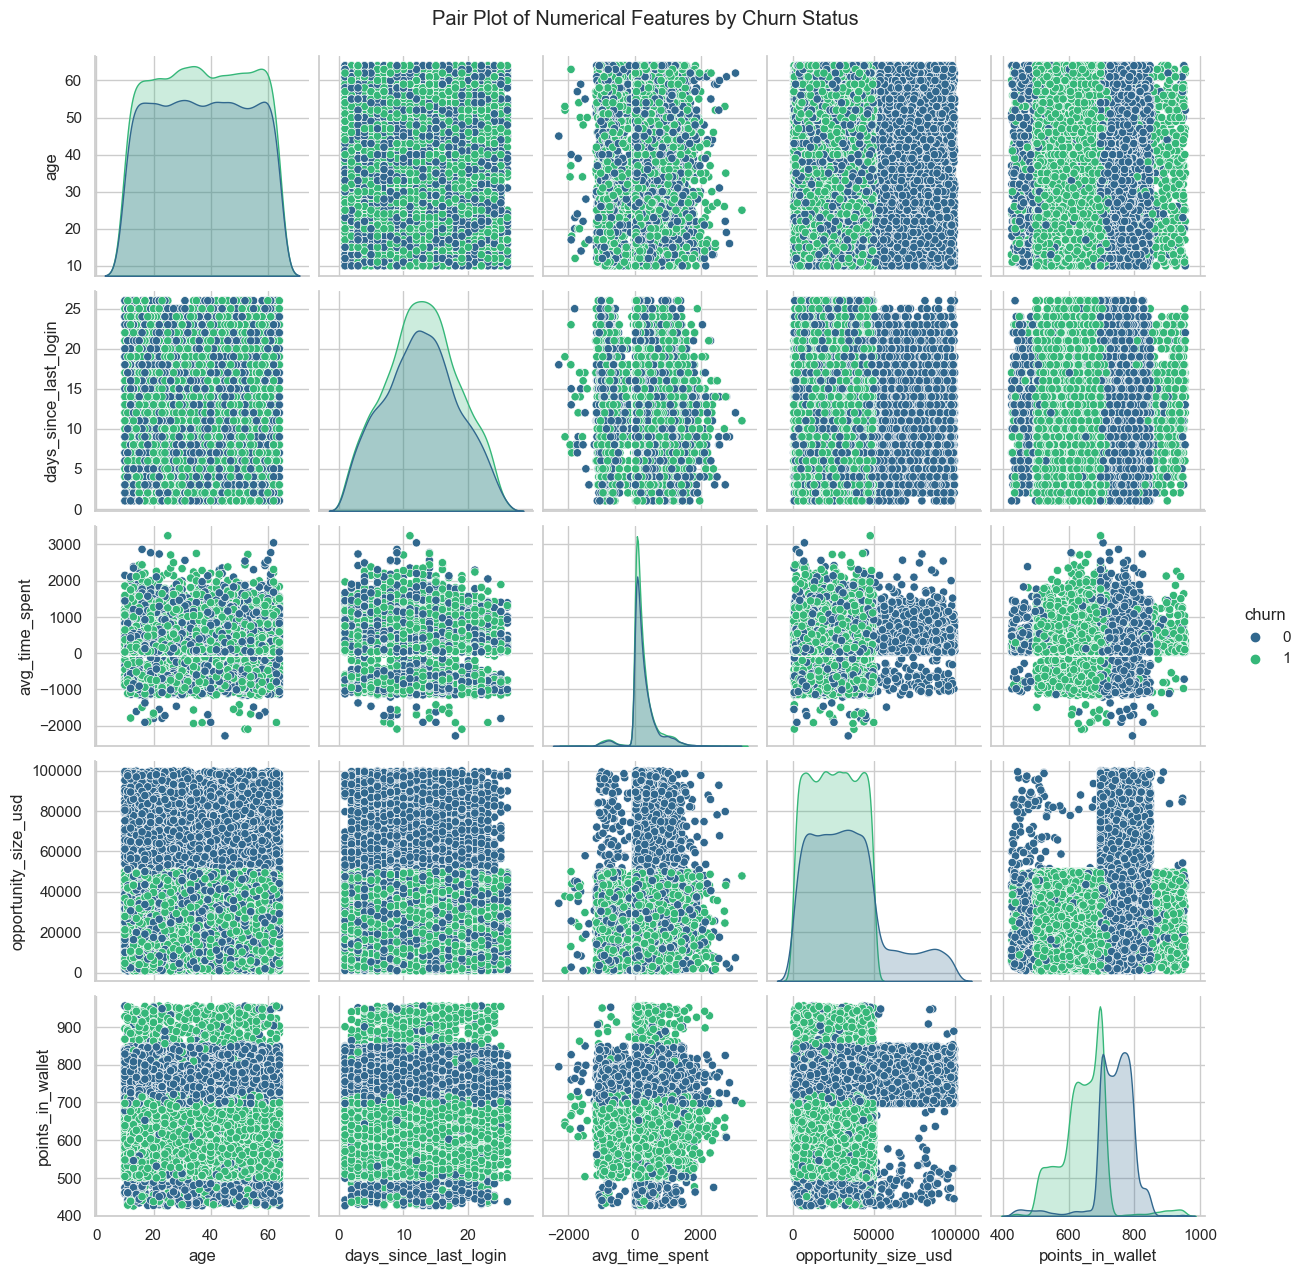

In [47]:
# Convert 'churn' column to categorical if it's not already
df['churn'] = df['churn'].astype('category')

# Select numerical columns for pair plot
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Add the 'churn' column to the selected columns
selected_columns = ['churn'] + list(numerical_columns)

# Create a pair plot
pair_plot = sns.pairplot(df[selected_columns], hue='churn', palette='viridis')
pair_plot.fig.suptitle('Pair Plot of Numerical Features by Churn Status', y=1.02)
plt.show()
